$maximum
[1] 4.00006

$objective
[1] 0.5404008

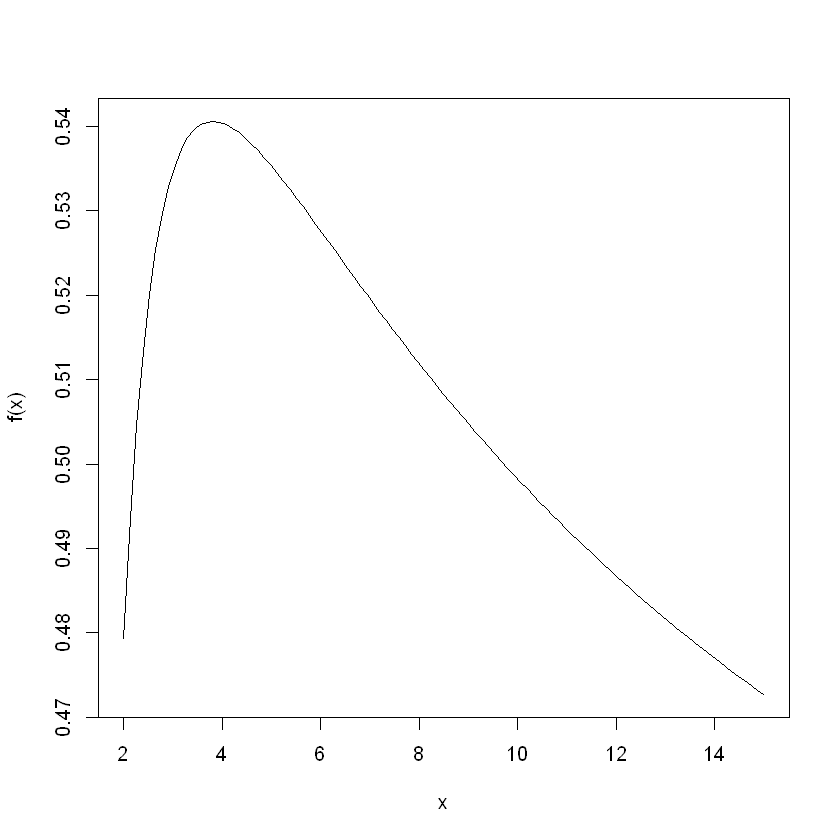

In [3]:
f<-function(x){
    log(1 + log(x))/log(1+x)
}
curve(f(x),from=2,to=15,ylab='f(x)')
optimize(f,lower=4,upper=8,maximum=TRUE)

In [14]:
negloglik<-function(mu,sig,x){
    n<-length(x)
    val<-(-((n/2)*log(sig^2))-((n/2)*log(2*pi))-((1/(2*sig^2)))*sum((x-mu)^2))
    return(-val)
}
xsim<-rnorm(1000,5,3)
mle<-optim(par=c(2,1),fn=negloglik,x=xsim)
mle

ERROR: Error in fn(par, ...): argument "sig" is missing, with no default


In [16]:
negloglik <- function(par, x) {
    mu <- par[1]
    sig <- par[2]
    n <- length(x)
    val <- (-((n / 2) * log(sig^2)) - ((n / 2) * log(2 * pi)) - ((1 / (2 * sig^2))) * sum((x - mu)^2))
    return(-val)
}

xsim <- rnorm(1000, 5, 3)
mle <- optim(par = c(2, 1), fn = negloglik, x = xsim)
mle

$par
[1] 5.093269 2.913988

$value
[1] 2488.66

$counts
function gradient 
      65       NA 

$convergence
[1] 0

$message
NULL

In [22]:
negloglik <- function(par, x) {
    mu <- par[1]
    sig <- par[2]
    n <- length(x)
    val <- (-((n / 2) * log(sig^2)) - ((n / 2) * log(2 * pi)) - ((1 / (2 * sig^2))) * sum((x - mu)^2))
    return(-val)
}

xsim <- rnorm(1000, 5, 3)
mle <- optim(par = c(2, 1), fn = negloglik, x = xsim)
mle

$par
[1] 5.004681 2.985638

$value
[1] 2512.362

$counts
function gradient 
      65       NA 

$convergence
[1] 0

$message
NULL

by default,optim is  a minimization function 
Apply other methods to find the initial value eg MME
FGS
FBGS
FLGFBS

In [26]:
negpoislik<-function(data,lam){
    val<-sum(dpois(x=data,lambda=lam,log=TRUE))
    return(-val)
}
data.sim<-rpois(1000,5)
mlepois<-optim(par=2,fn= negpoislik,data=data.sim,method="L-BFGS-B")
mlepois

$par
[1] 4.957

$value
[1] 2245.904

$counts
function gradient 
       8        8 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [34]:
neglikreg<-function(par,y,x){
    n<-length(x)
    B0<-par[1]
    B1<-par[2]
    sig<-par[3]
    result<-(-((n / 2) * log(sig^2)) - ((n / 2) * log(2 * pi)) - ((1 / (2 * sig^2))) * sum((y-B0-(B1*x))^2))
    return(-result)
}
xsim<-rnorm(100,4,2)
ysim<-4+2*(xsim) + rnorm(100,0,1)
mle<-optim(par=c(1,1,0.5),fn=neglikreg,y=ysim,x=xsim)
mle$par


[1] 4.255403 1.962267 1.028142

In [36]:
neglikreg<-function(par,y,x){
    n<-length(x)
    B0<-par[1]
    B1<-par[2]
    sig<-par[3]
    result<-(-((n / 2) * log(sig^2)) - ((n / 2) * log(2 * pi)) - ((1 / (2 * sig^2))) * sum((y-B0-(B1*x))^2))
    return(-result)
}
xsim<-rnorm(100,4,2)
ysim<-4+2*(xsim) + rnorm(100,0,1)
mle<-optim(par=c(1,2,3),fn=neglikreg,y=ysim,x=xsim)
mle$par
model<-lm(ysim~xsim)
summary(model)

[1] 4.2926859 1.9566453 0.9543328


Call:
lm(formula = ysim ~ xsim)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16780 -0.72858  0.05884  0.54152  2.46220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.29293    0.22285   19.26   <2e-16 ***
xsim         1.95660    0.04746   41.23   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9639 on 98 degrees of freedom
Multiple R-squared:  0.9455,	Adjusted R-squared:  0.9449 
F-statistic:  1700 on 1 and 98 DF,  p-value: < 2.2e-16
